### Preprocess

preprocess the screenshot files in the img/ directory to separate the front camera view,
as well as the left and right side mirror views.

the csv file is also modified to represent the preprocessed images.

let's open the csv file

In [1]:
%ls ../data

9d0c3c2b.csv  img/


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/9d0c3c2b.csv', header=0)
print("%d rows" % df.shape[0])
df.head(3)

1357 rows


,id,img,wheel-axis,clutch,brake,gas,paddle-left,paddle-right,wheel-button-left-1,wheel-button-left-2,...,shifter-button-2,shifter-button-3,shifter-button-4,gear-1,gear-2,gear-3,gear-4,gear-5,gear-6,gear-R
0,0,9d0c3c2b_2017_07_27_14_55_08_16.jpg,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,9d0c3c2b_2017_07_27_14_55_08_26.jpg,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,9d0c3c2b_2017_07_27_14_55_08_36.jpg,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


open one of the image files

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import os
img_dir_path = '../data/img/raw/'
img_front_dir_path = '../data/img/front/'
img_left_dir_path = '../data/img/side_left/'
img_right_dir_path = '../data/img/side_right/'

image size is (1024, 768)


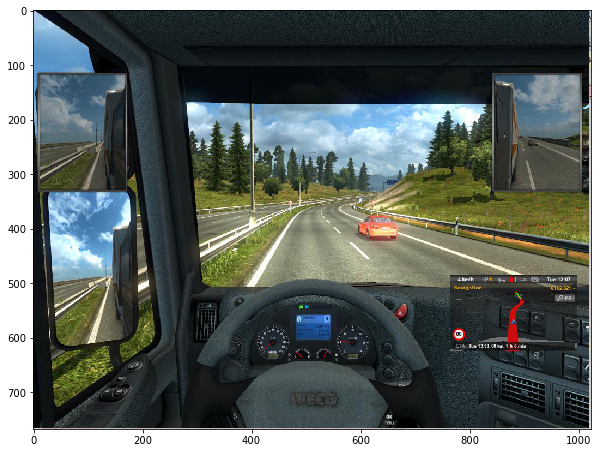

In [5]:
img_path = os.path.join(img_dir_path, df['img'][0])
img = Image.open(img_path)
print("image size is %s" % (img.size,))

fig = plt.figure(figsize = (10,10))
plt.imshow(img)

As shown above, the screenshot from Euro Truck Simulator(ETS) has several information, such as
the route advisor showing the map, two side mirrors, the car dashboard, and the front view.

Let's divide the screenshot image such that there are three "cameras", each of which is facing the front, left side, and right side.

In [6]:
# define coordinates
front_coord = (289,167, 851, 508)
left_coord = (13, 119, 171, 331)
right_coord = (846, 118, 1004, 330)

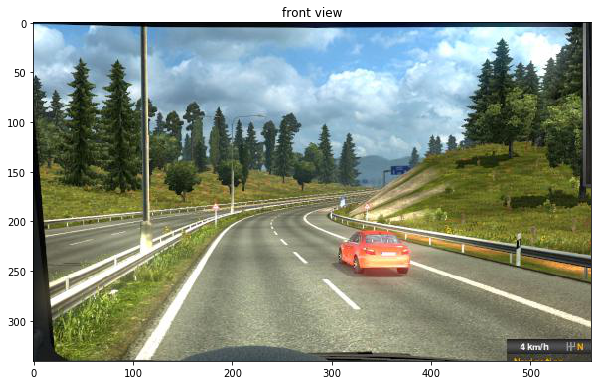

In [7]:
img_front = img.crop(front_coord)
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(title='front view')
ax.imshow(img_front)

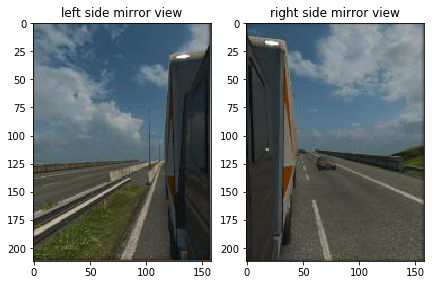

In [8]:
img_left = img.crop(left_coord)
img_right = img.crop(right_coord)
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(7,7))
ax0.set(title='left side mirror view')
ax0.imshow(img_left)
ax1.set(title='right side mirror view')
ax1.imshow(img_right)

Save the image to directory, and add the path to the csv file.

In [9]:
def rename_file(f, s):
    # 2017.jpg -> 2017_front.jpg
    return f.split('.')[0] + s + '.' + f.split('.')[1]

In [10]:
img_front_path_list = []
img_left_path_list = []
img_right_path_list = []

for img_filename in df['img']:
    img_path = os.path.join(img_dir_path, img_filename)
    img = Image.open(img_path)
    
    img_front = img.crop(front_coord)
    img_left = img.crop(left_coord)
    img_right = img.crop(right_coord)
    
    img_front_path = rename_file(img_filename, '_front')
    img_left_path = rename_file(img_filename, '_left')
    img_right_path = rename_file(img_filename, '_right')
    
    img_front_path_list.append(img_front_path)
    img_left_path_list.append(img_left_path)
    img_right_path_list.append(img_right_path)
    
    img_front.save(os.path.join(img_front_dir_path, img_front_path))
    img_left.save(os.path.join(img_left_dir_path, img_left_path))
    img_right.save(os.path.join(img_right_dir_path, img_right_path))

In [11]:
df['front'] = img_front_path_list
df['side_left'] = img_left_path_list
df['side_right'] = img_right_path_list

Check to csv file, and overwrite to the original file.

In [12]:
df.head(3)

,id,img,wheel-axis,clutch,brake,gas,paddle-left,paddle-right,wheel-button-left-1,wheel-button-left-2,...,gear-1,gear-2,gear-3,gear-4,gear-5,gear-6,gear-R,front,side_left,side_right
0,0,9d0c3c2b_2017_07_27_14_55_08_16.jpg,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9d0c3c2b_2017_07_27_14_55_08_16_front.jpg,9d0c3c2b_2017_07_27_14_55_08_16_left.jpg,9d0c3c2b_2017_07_27_14_55_08_16_right.jpg
1,1,9d0c3c2b_2017_07_27_14_55_08_26.jpg,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9d0c3c2b_2017_07_27_14_55_08_26_front.jpg,9d0c3c2b_2017_07_27_14_55_08_26_left.jpg,9d0c3c2b_2017_07_27_14_55_08_26_right.jpg
2,2,9d0c3c2b_2017_07_27_14_55_08_36.jpg,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9d0c3c2b_2017_07_27_14_55_08_36_front.jpg,9d0c3c2b_2017_07_27_14_55_08_36_left.jpg,9d0c3c2b_2017_07_27_14_55_08_36_right.jpg


In [13]:
df.to_csv('../data/9d0c3c2b.csv', index=False)

Check to see that it was saved well

In [14]:
df = pd.read_csv('../data/9d0c3c2b.csv', header=0)
print("%d rows" % df.shape[0])
df.head(3)

1357 rows


,id,img,wheel-axis,clutch,brake,gas,paddle-left,paddle-right,wheel-button-left-1,wheel-button-left-2,...,gear-1,gear-2,gear-3,gear-4,gear-5,gear-6,gear-R,front,side_left,side_right
0,0,9d0c3c2b_2017_07_27_14_55_08_16.jpg,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9d0c3c2b_2017_07_27_14_55_08_16_front.jpg,9d0c3c2b_2017_07_27_14_55_08_16_left.jpg,9d0c3c2b_2017_07_27_14_55_08_16_right.jpg
1,1,9d0c3c2b_2017_07_27_14_55_08_26.jpg,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9d0c3c2b_2017_07_27_14_55_08_26_front.jpg,9d0c3c2b_2017_07_27_14_55_08_26_left.jpg,9d0c3c2b_2017_07_27_14_55_08_26_right.jpg
2,2,9d0c3c2b_2017_07_27_14_55_08_36.jpg,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9d0c3c2b_2017_07_27_14_55_08_36_front.jpg,9d0c3c2b_2017_07_27_14_55_08_36_left.jpg,9d0c3c2b_2017_07_27_14_55_08_36_right.jpg
